# โหลด R packages และ ข้อมูล

In [28]:
source("oaeTS.R", encoding = "UTF-8")
year_now = 2563

In [ ]:
price = readRDS('../data/rice/rice_price_tidy.rds')
price_xts = column_to_rownames(price, var = "date") %>% as.xts()

## ข้าวเจ้าอื่น

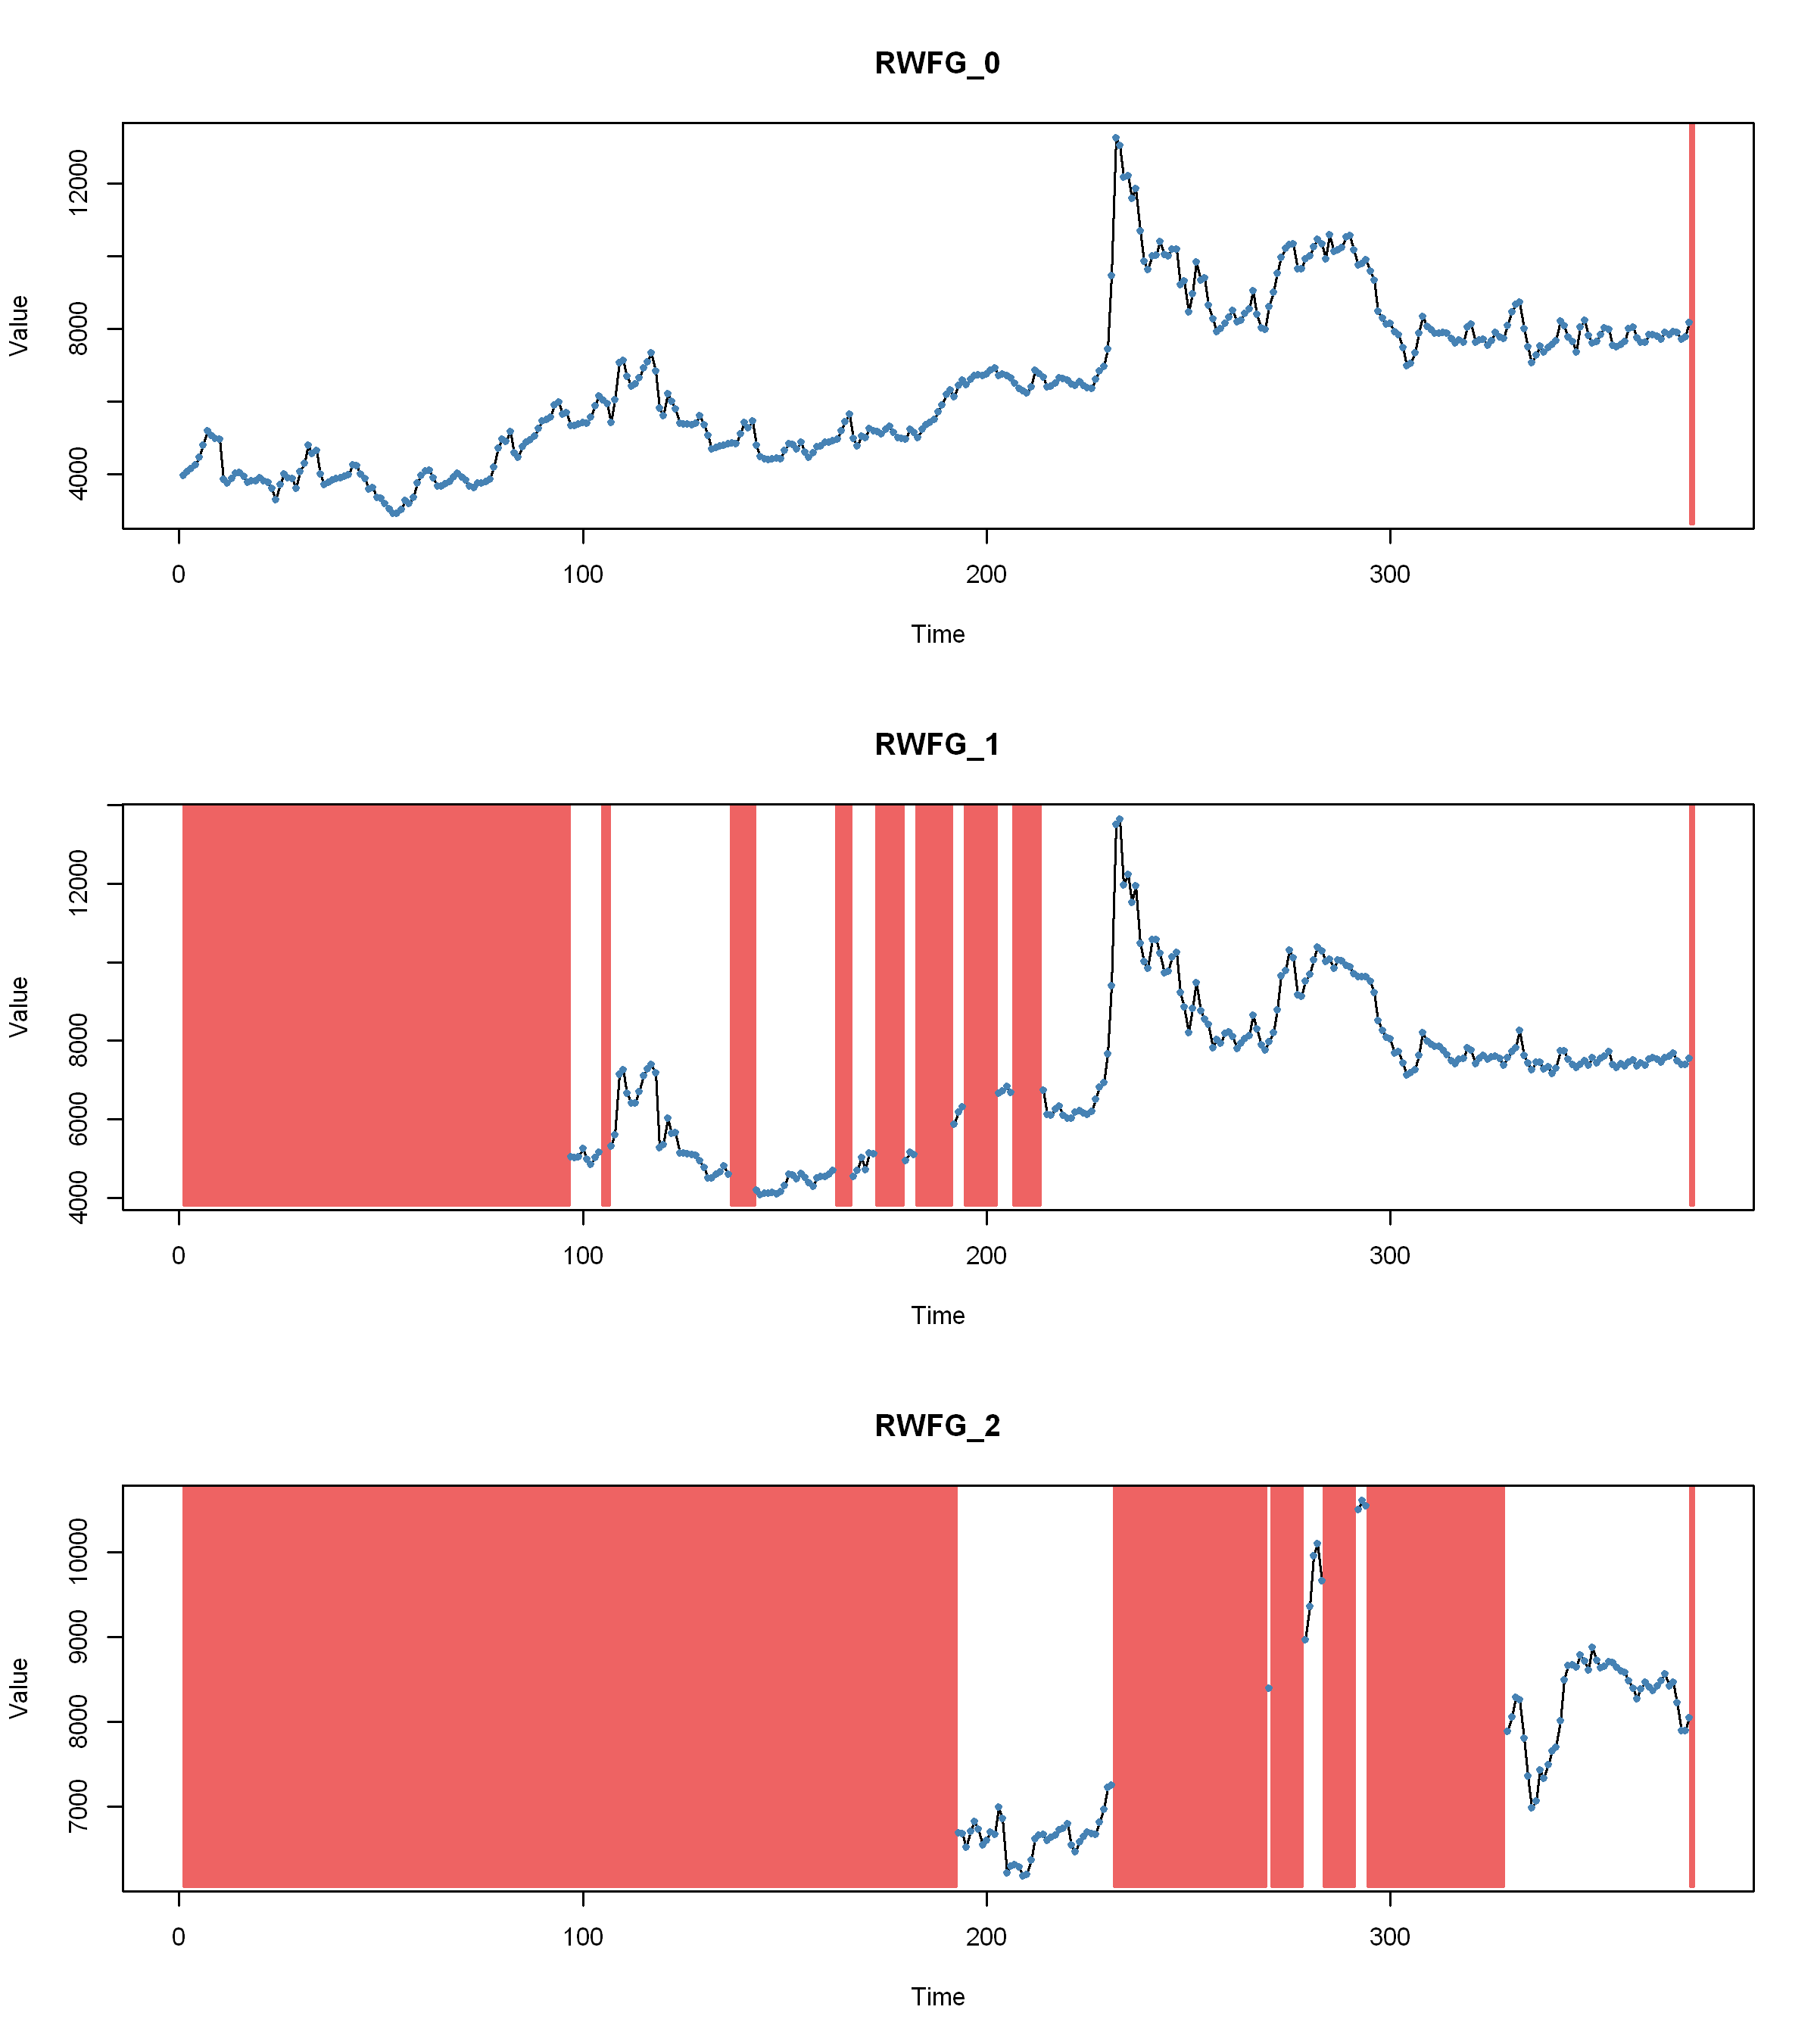

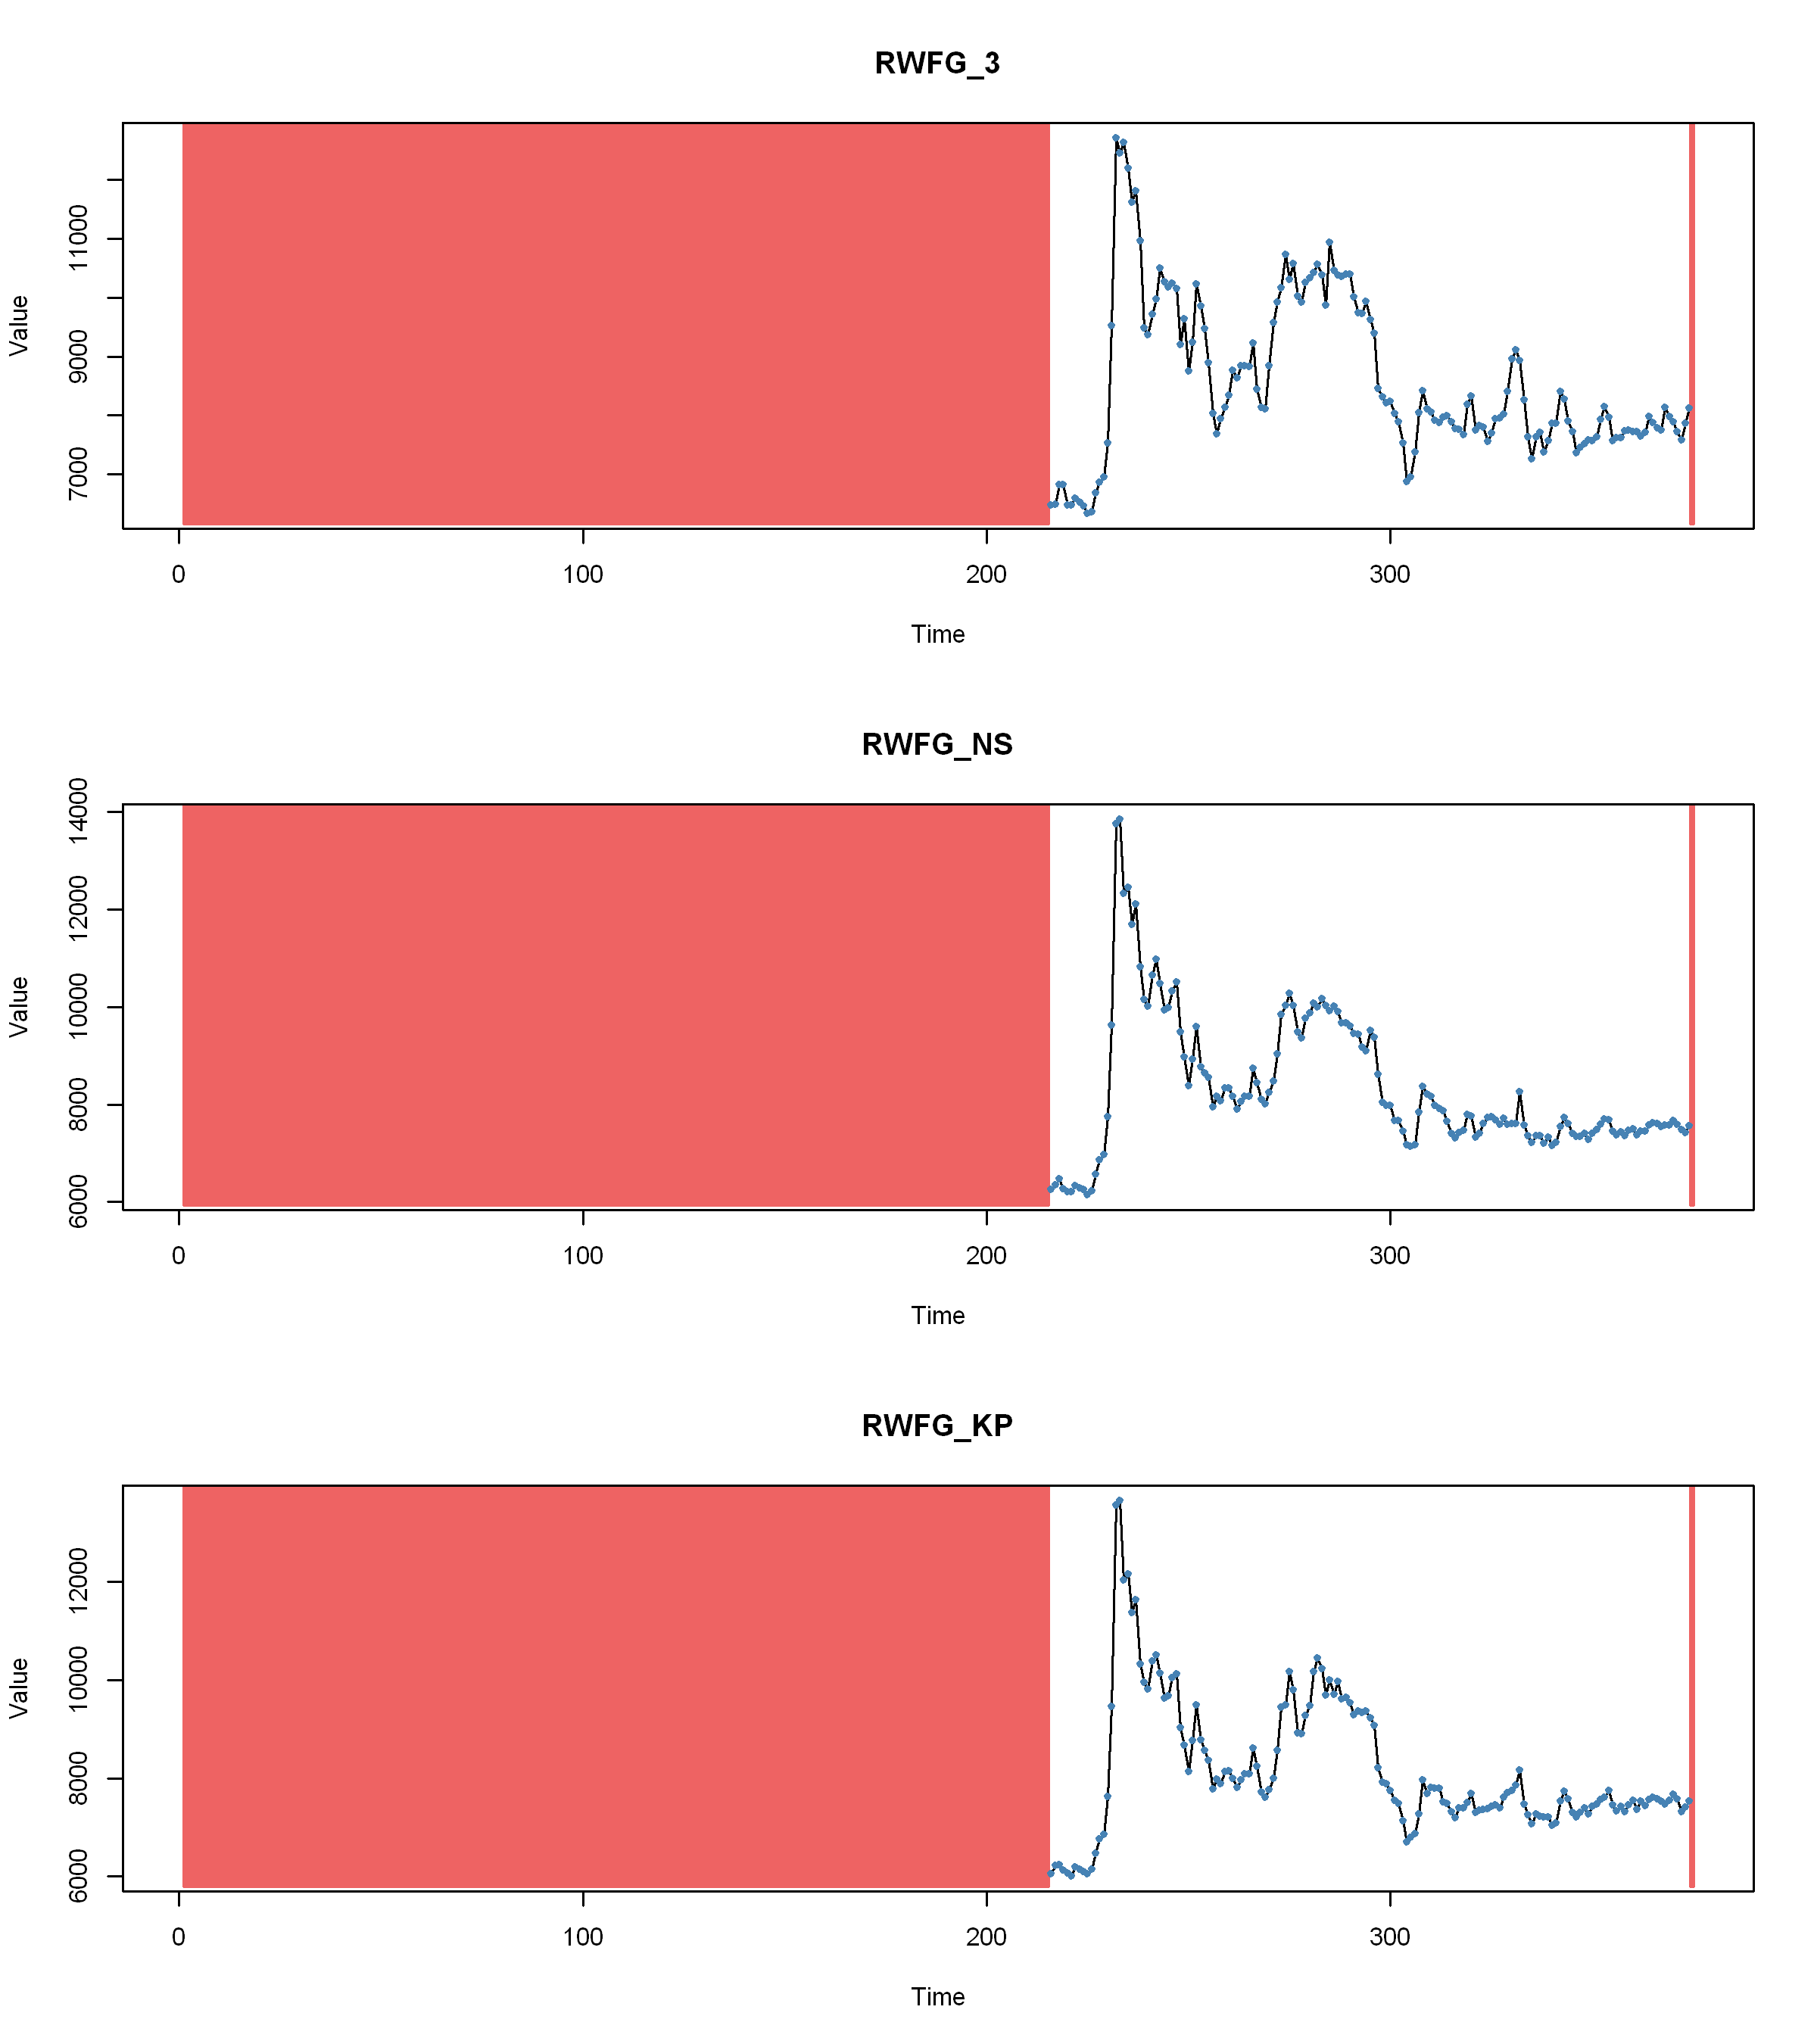

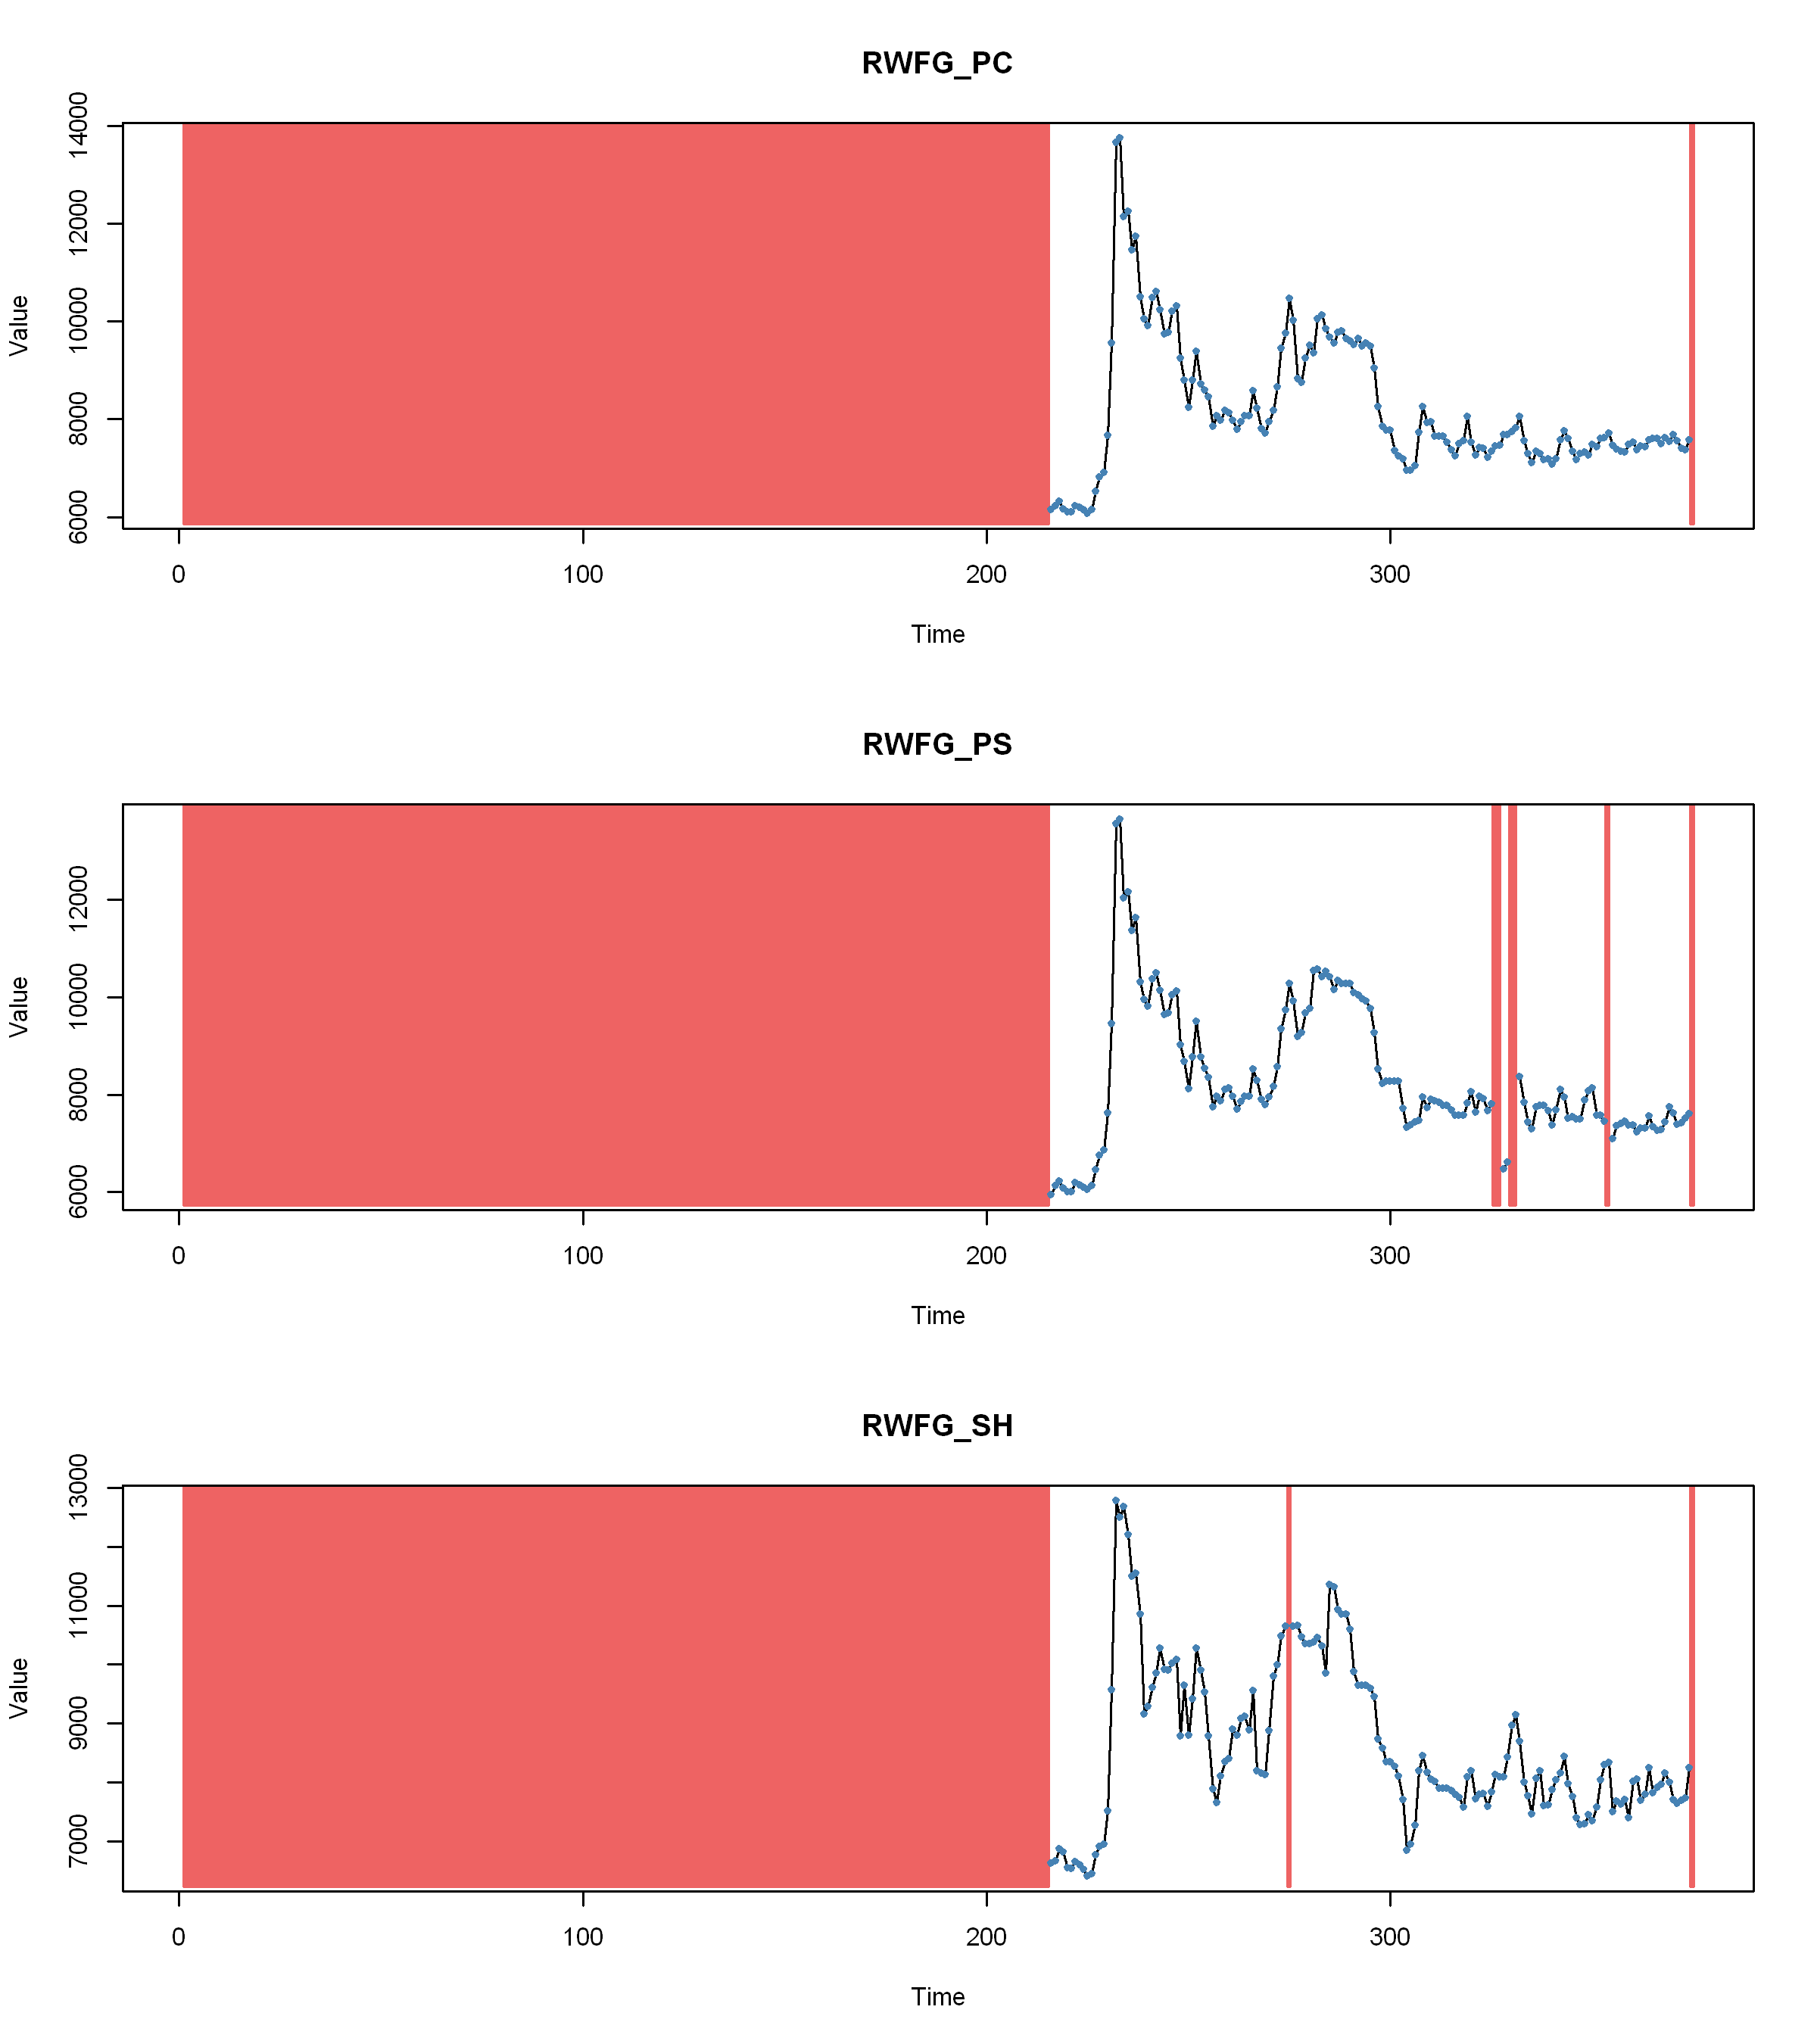

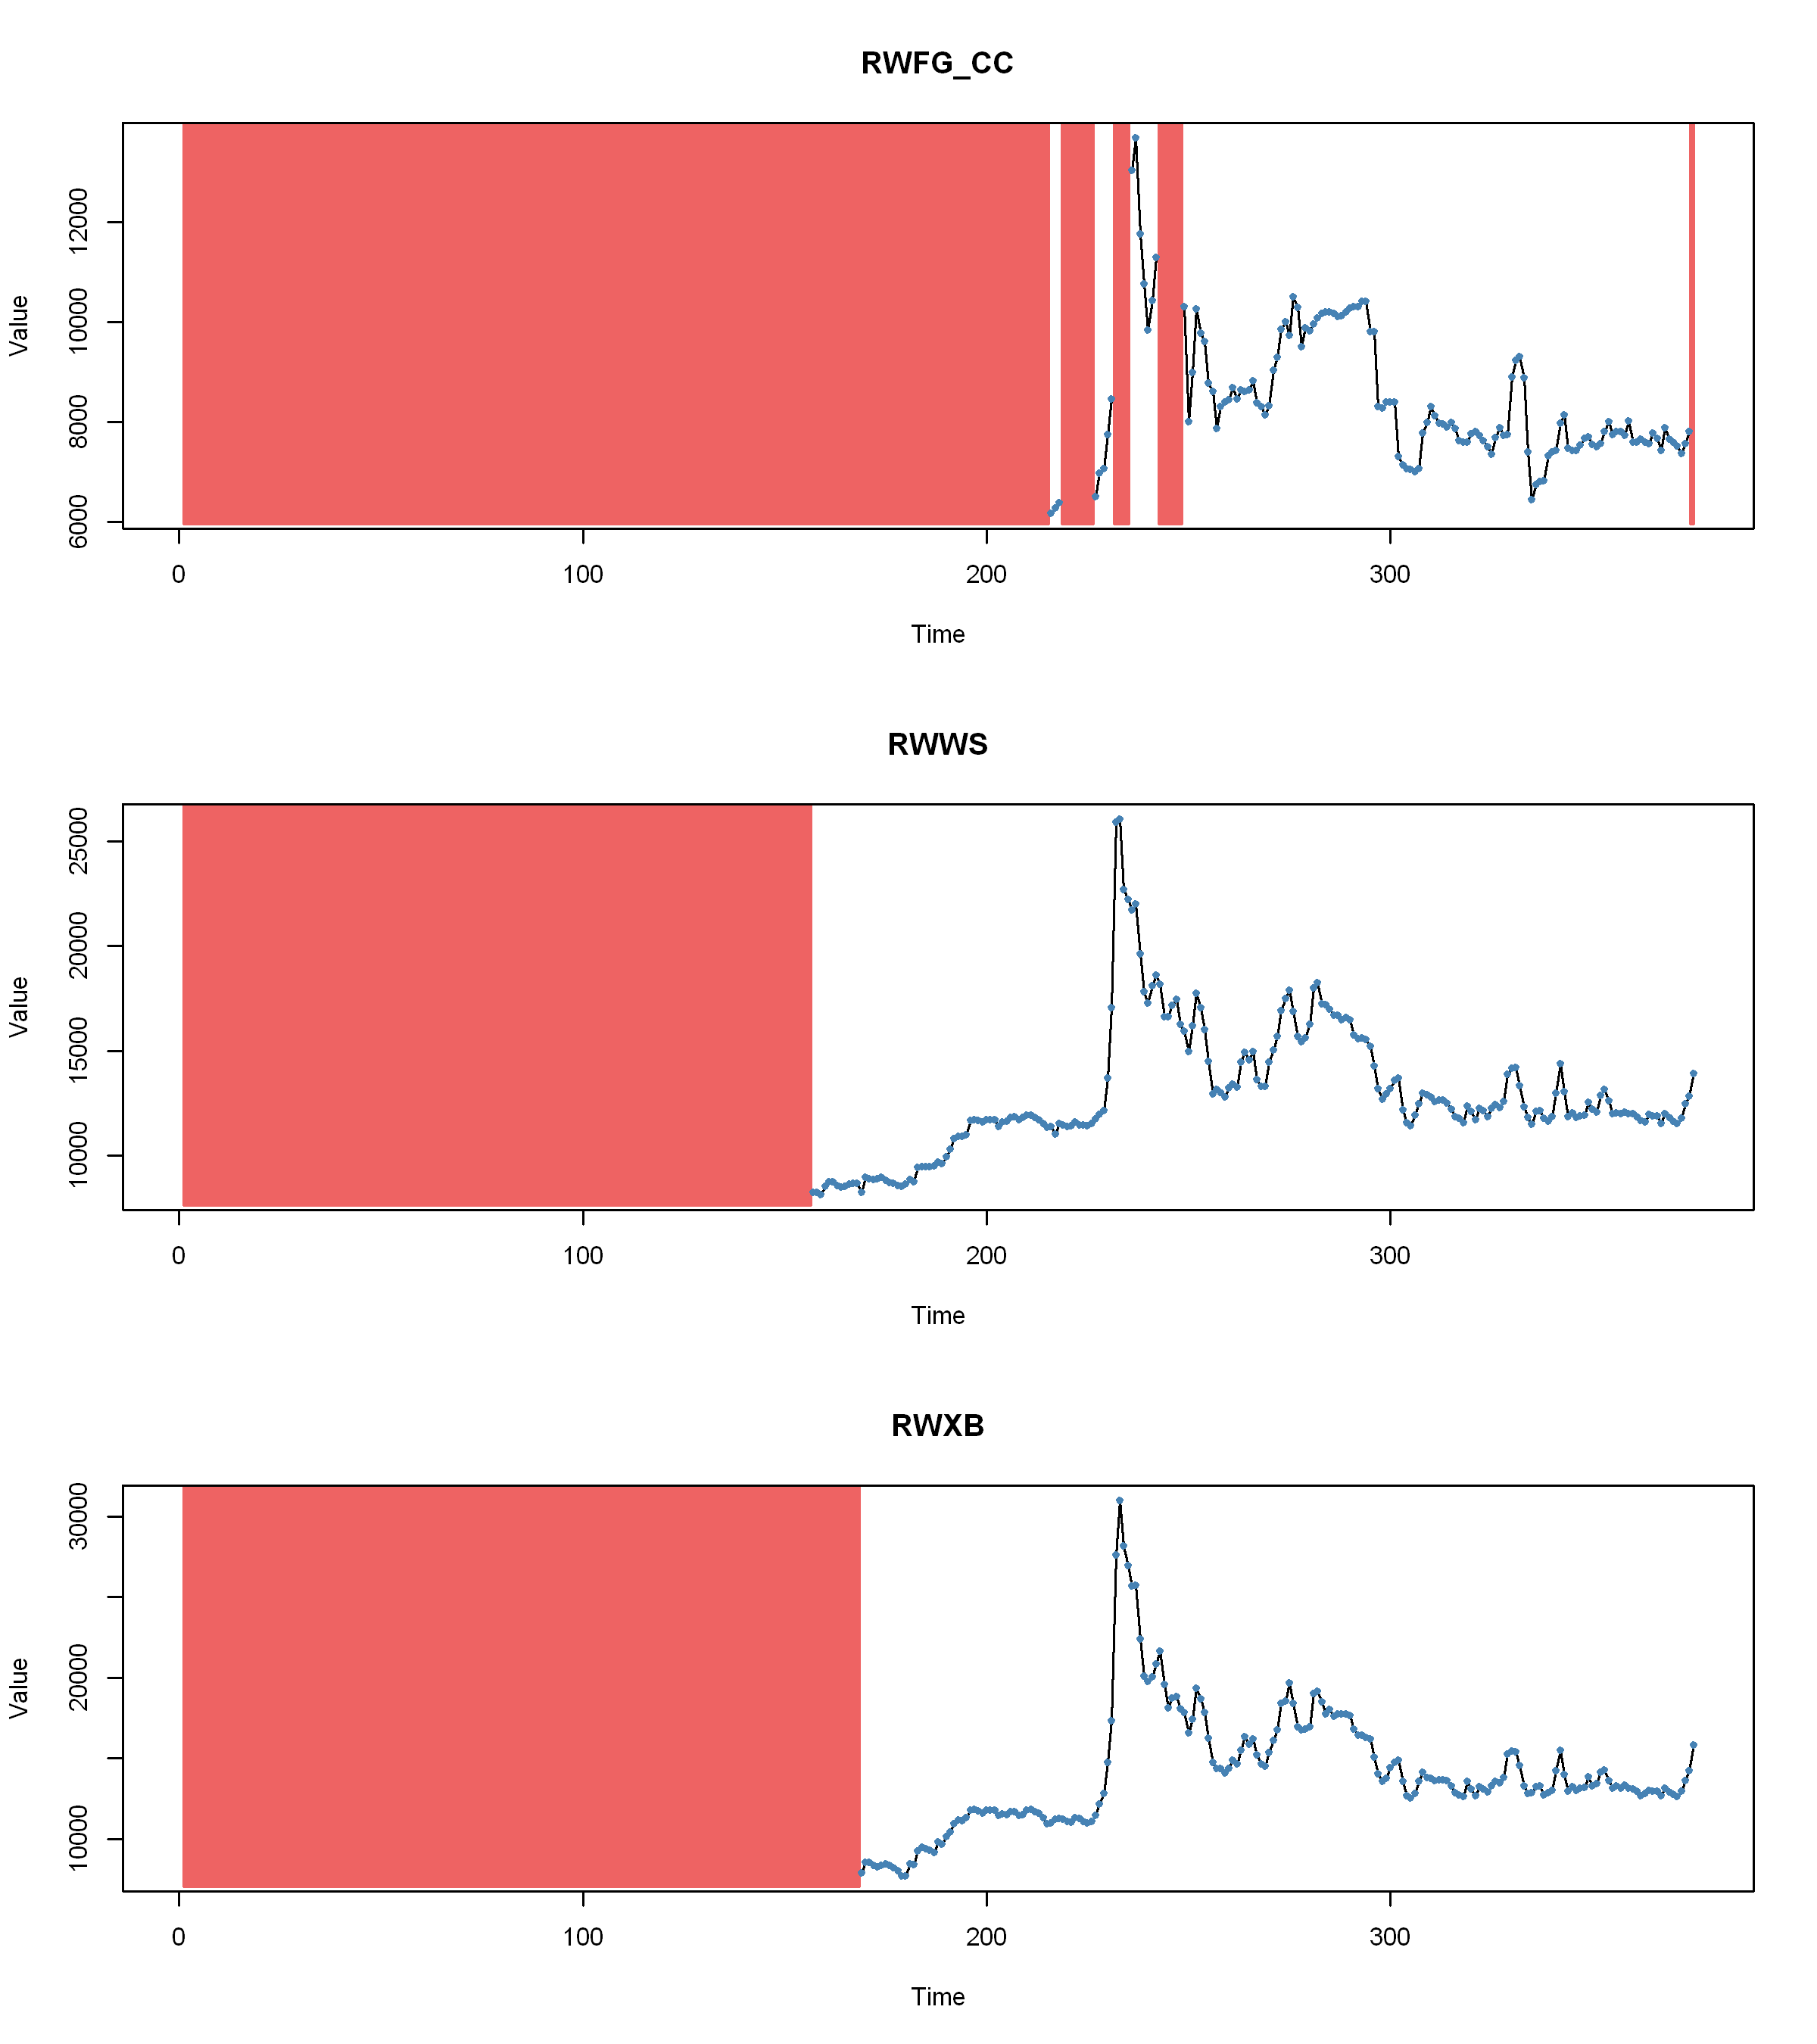

In [85]:
cols = names(price_xts)[startsWith(names(price_xts), 'RW')]
fgp = price_xts[, cols]
set_figsize(8, 9)
par(mfrow=c(3, 1))
for (i in 1:ncol(fgp)) {
  plotNA.distribution(fgp[,i], main=names(fgp)[i])
}

## ข้าวเหนียว

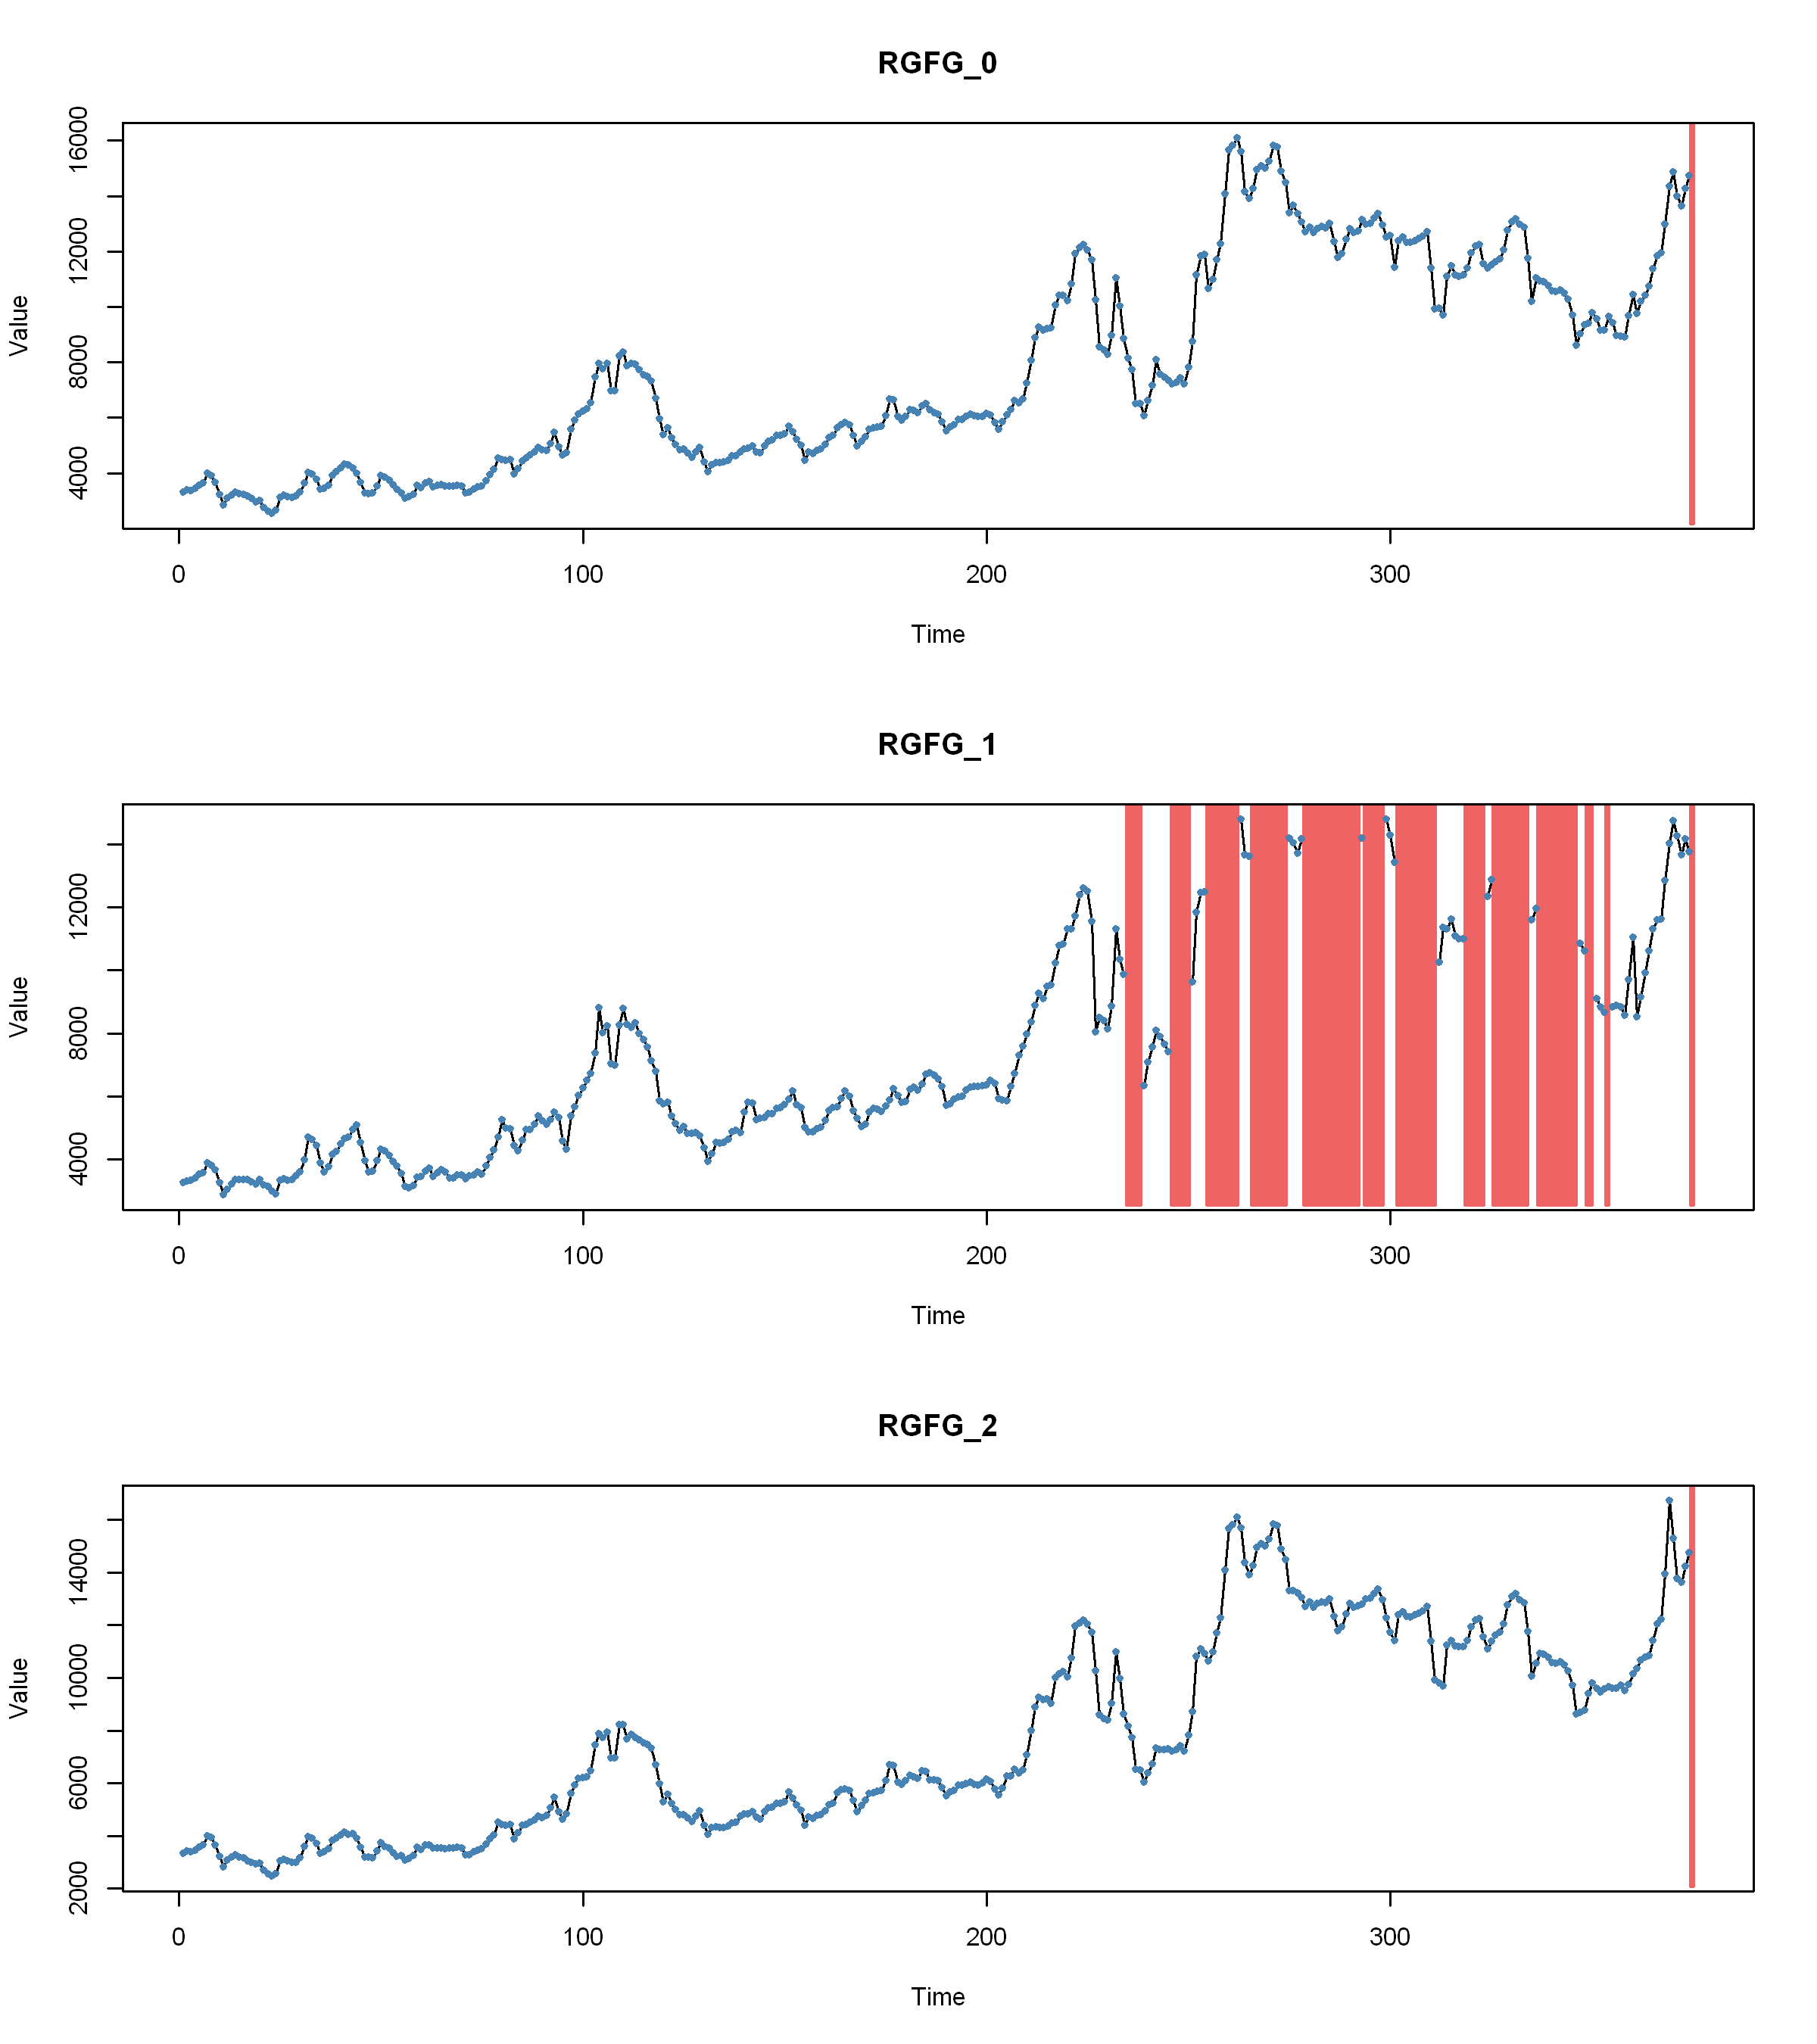

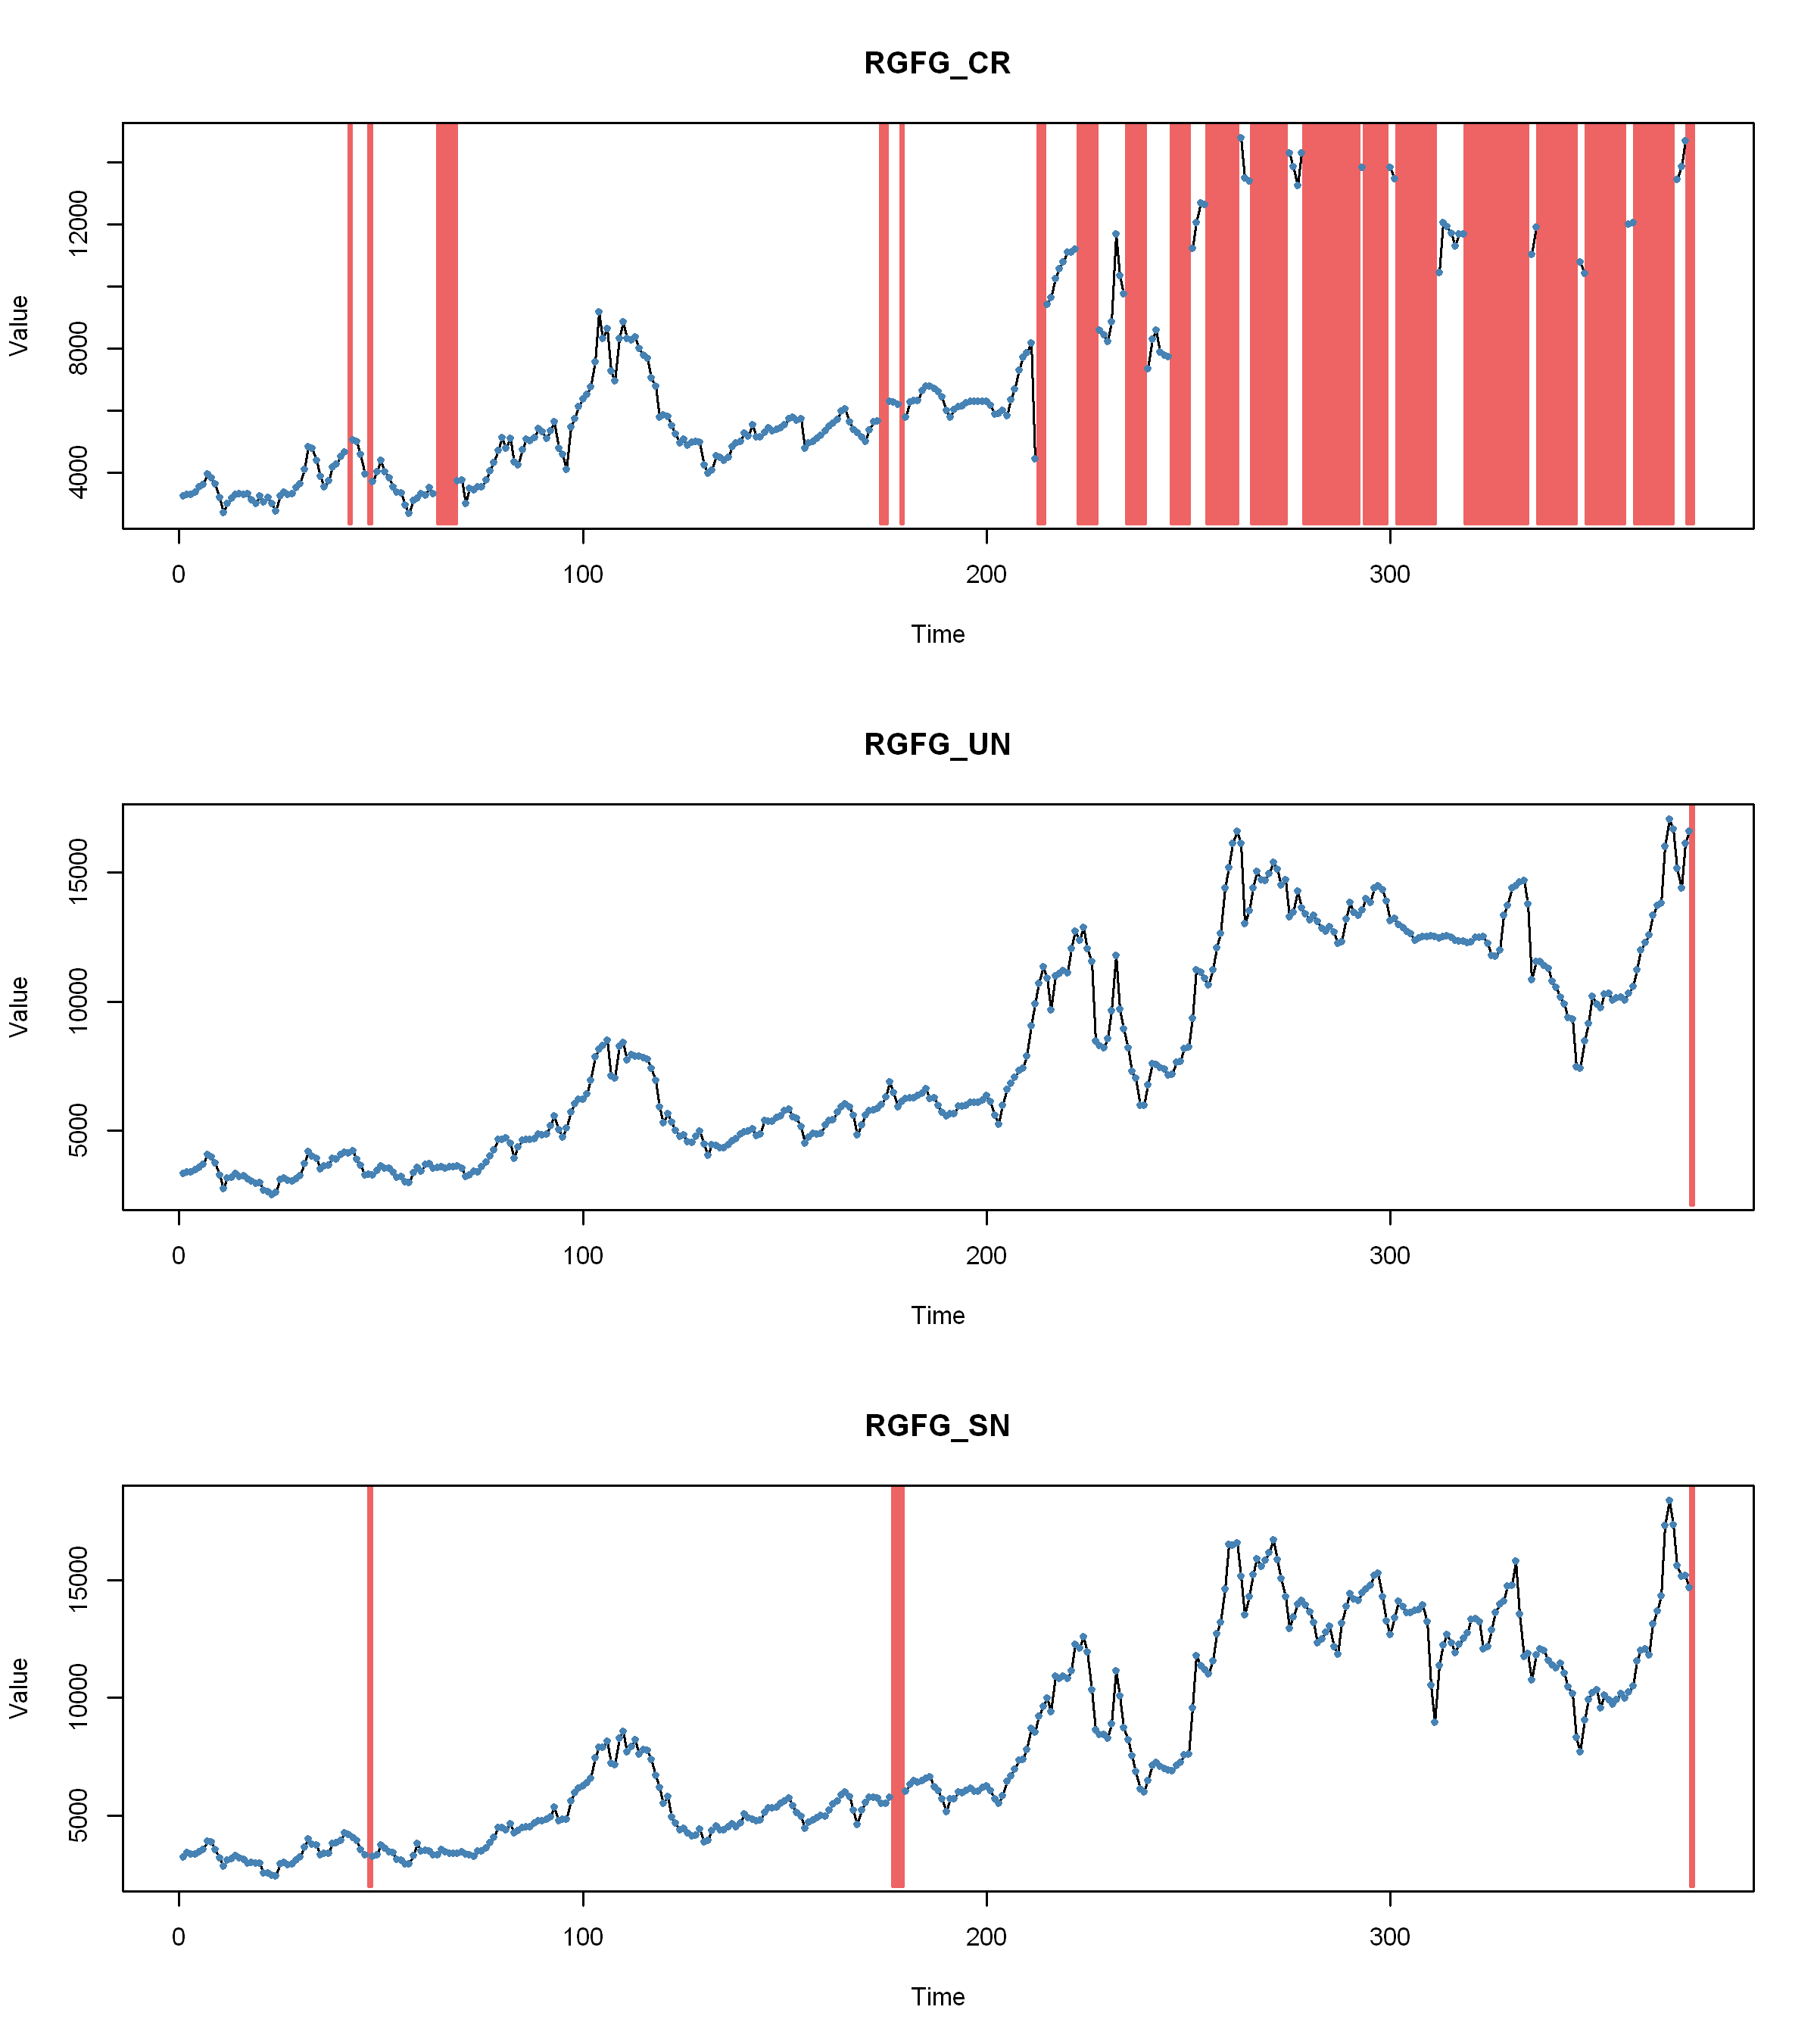

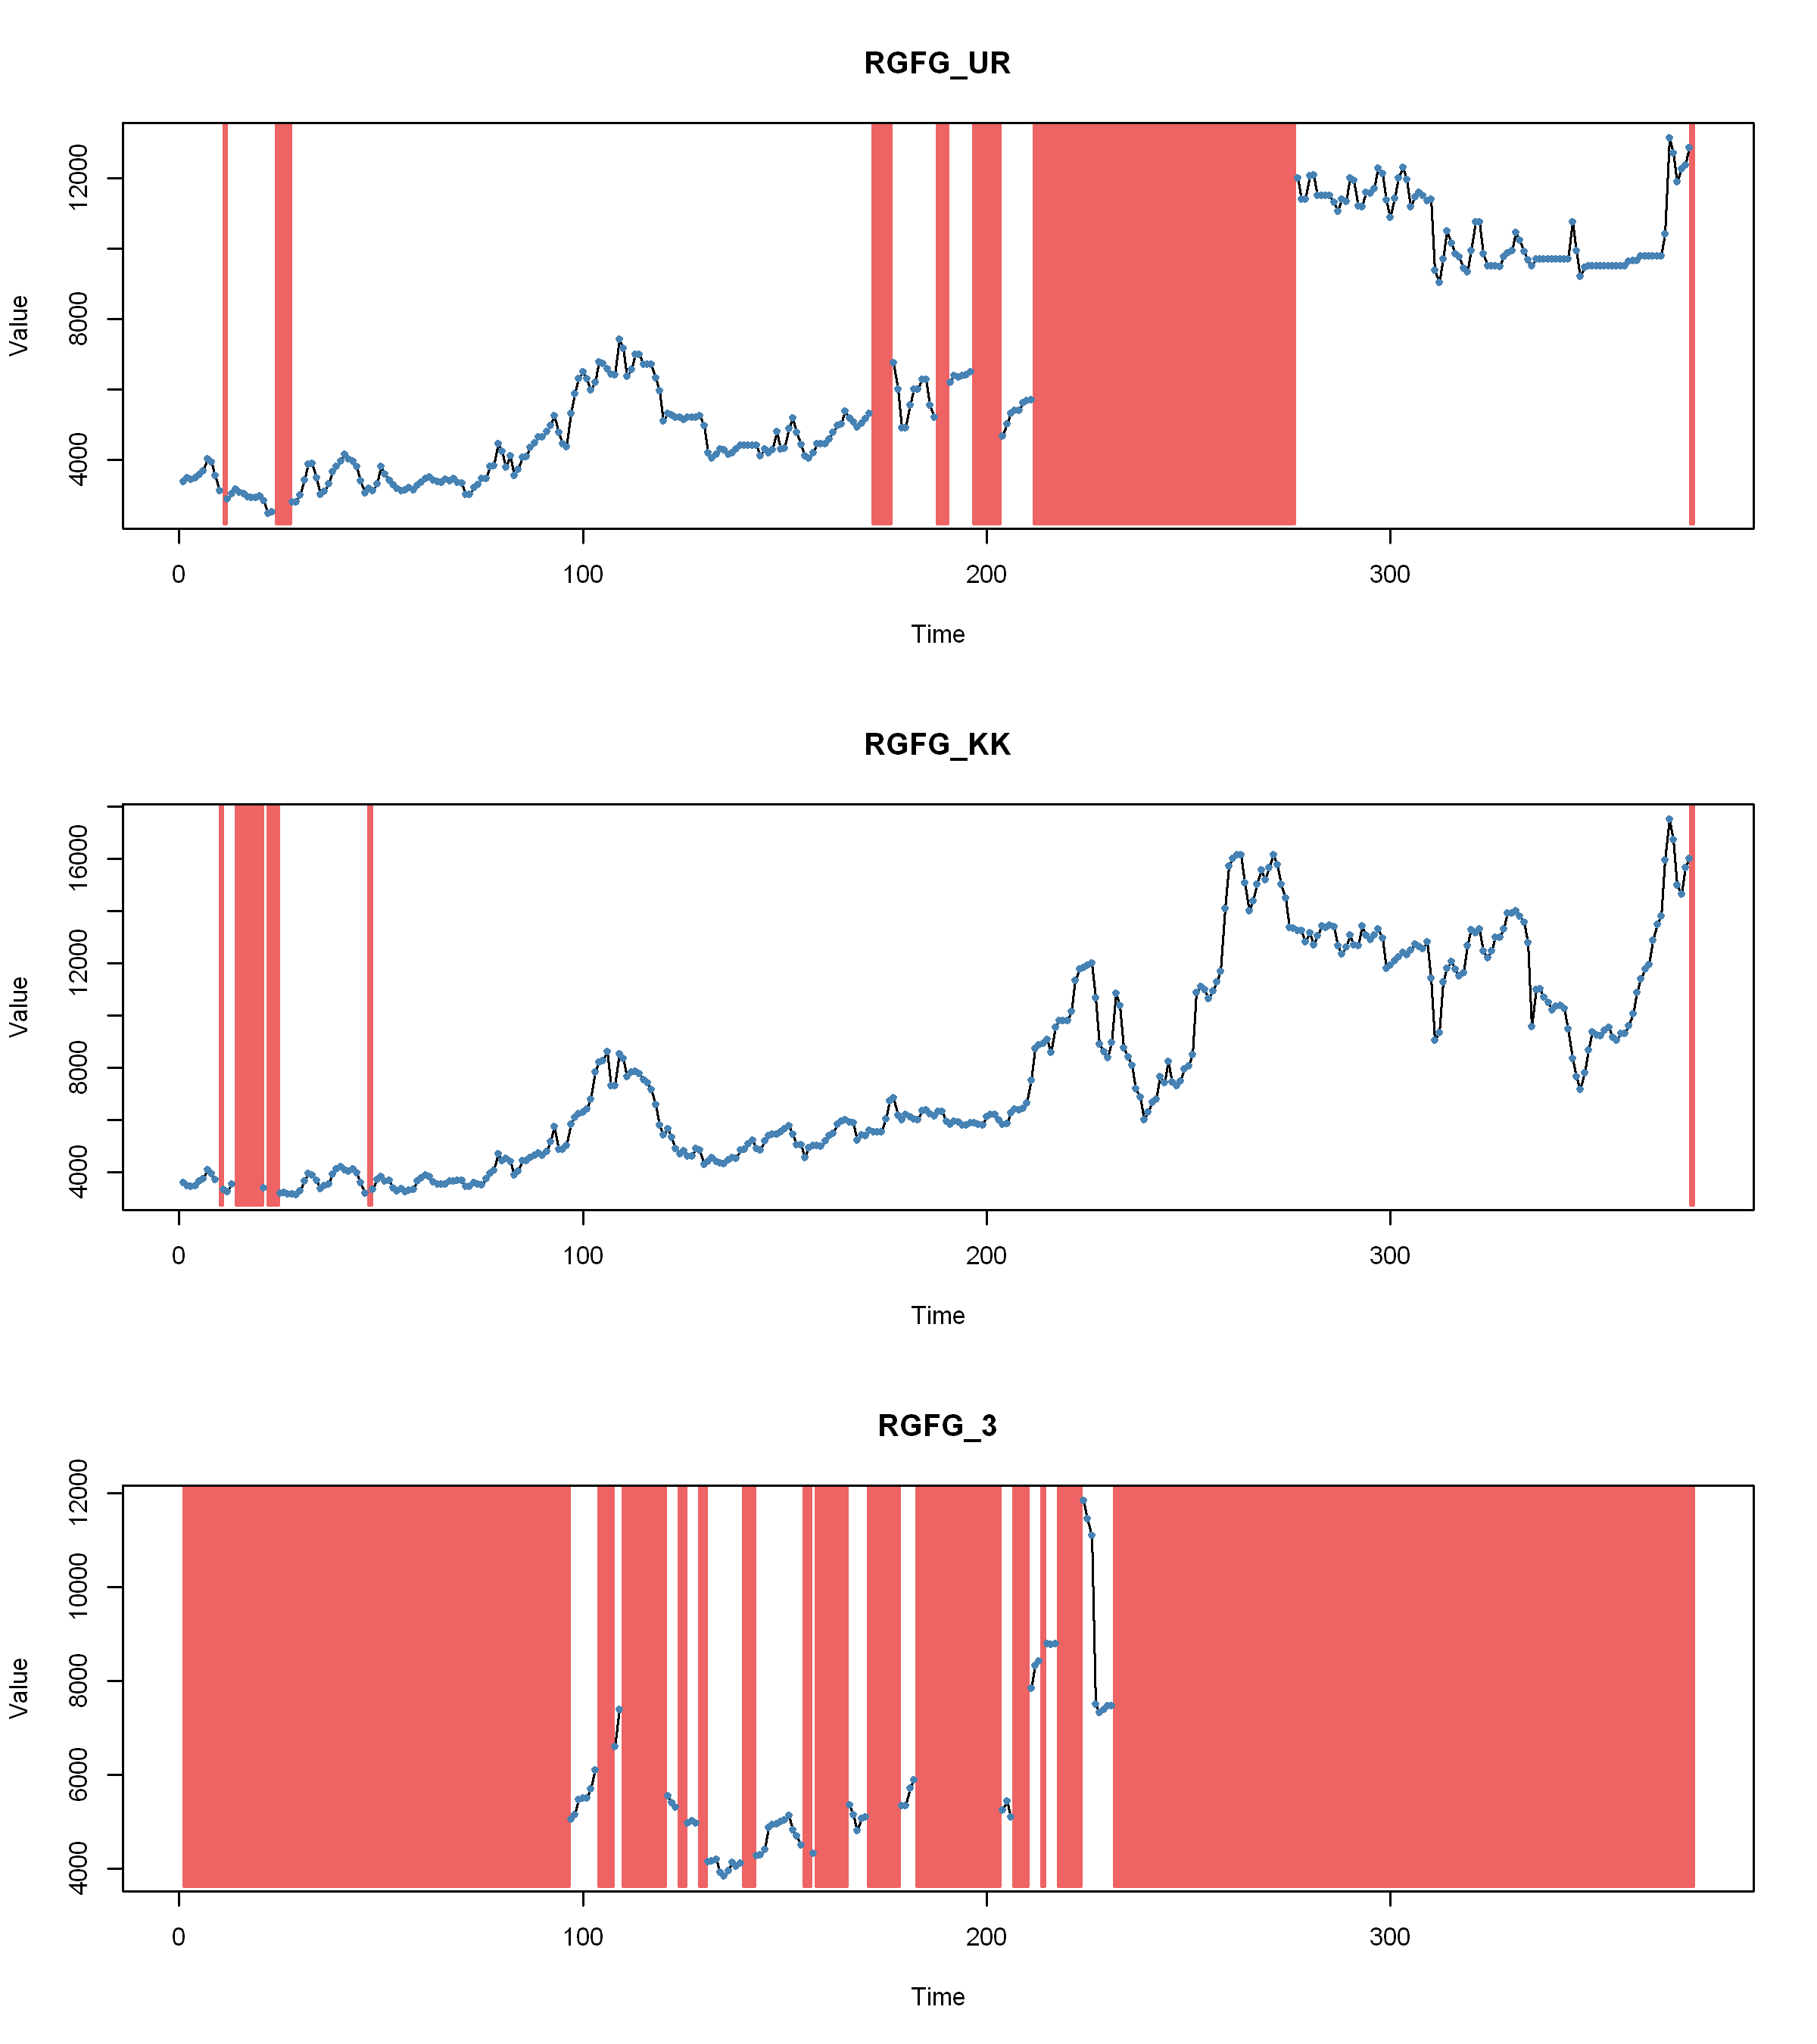

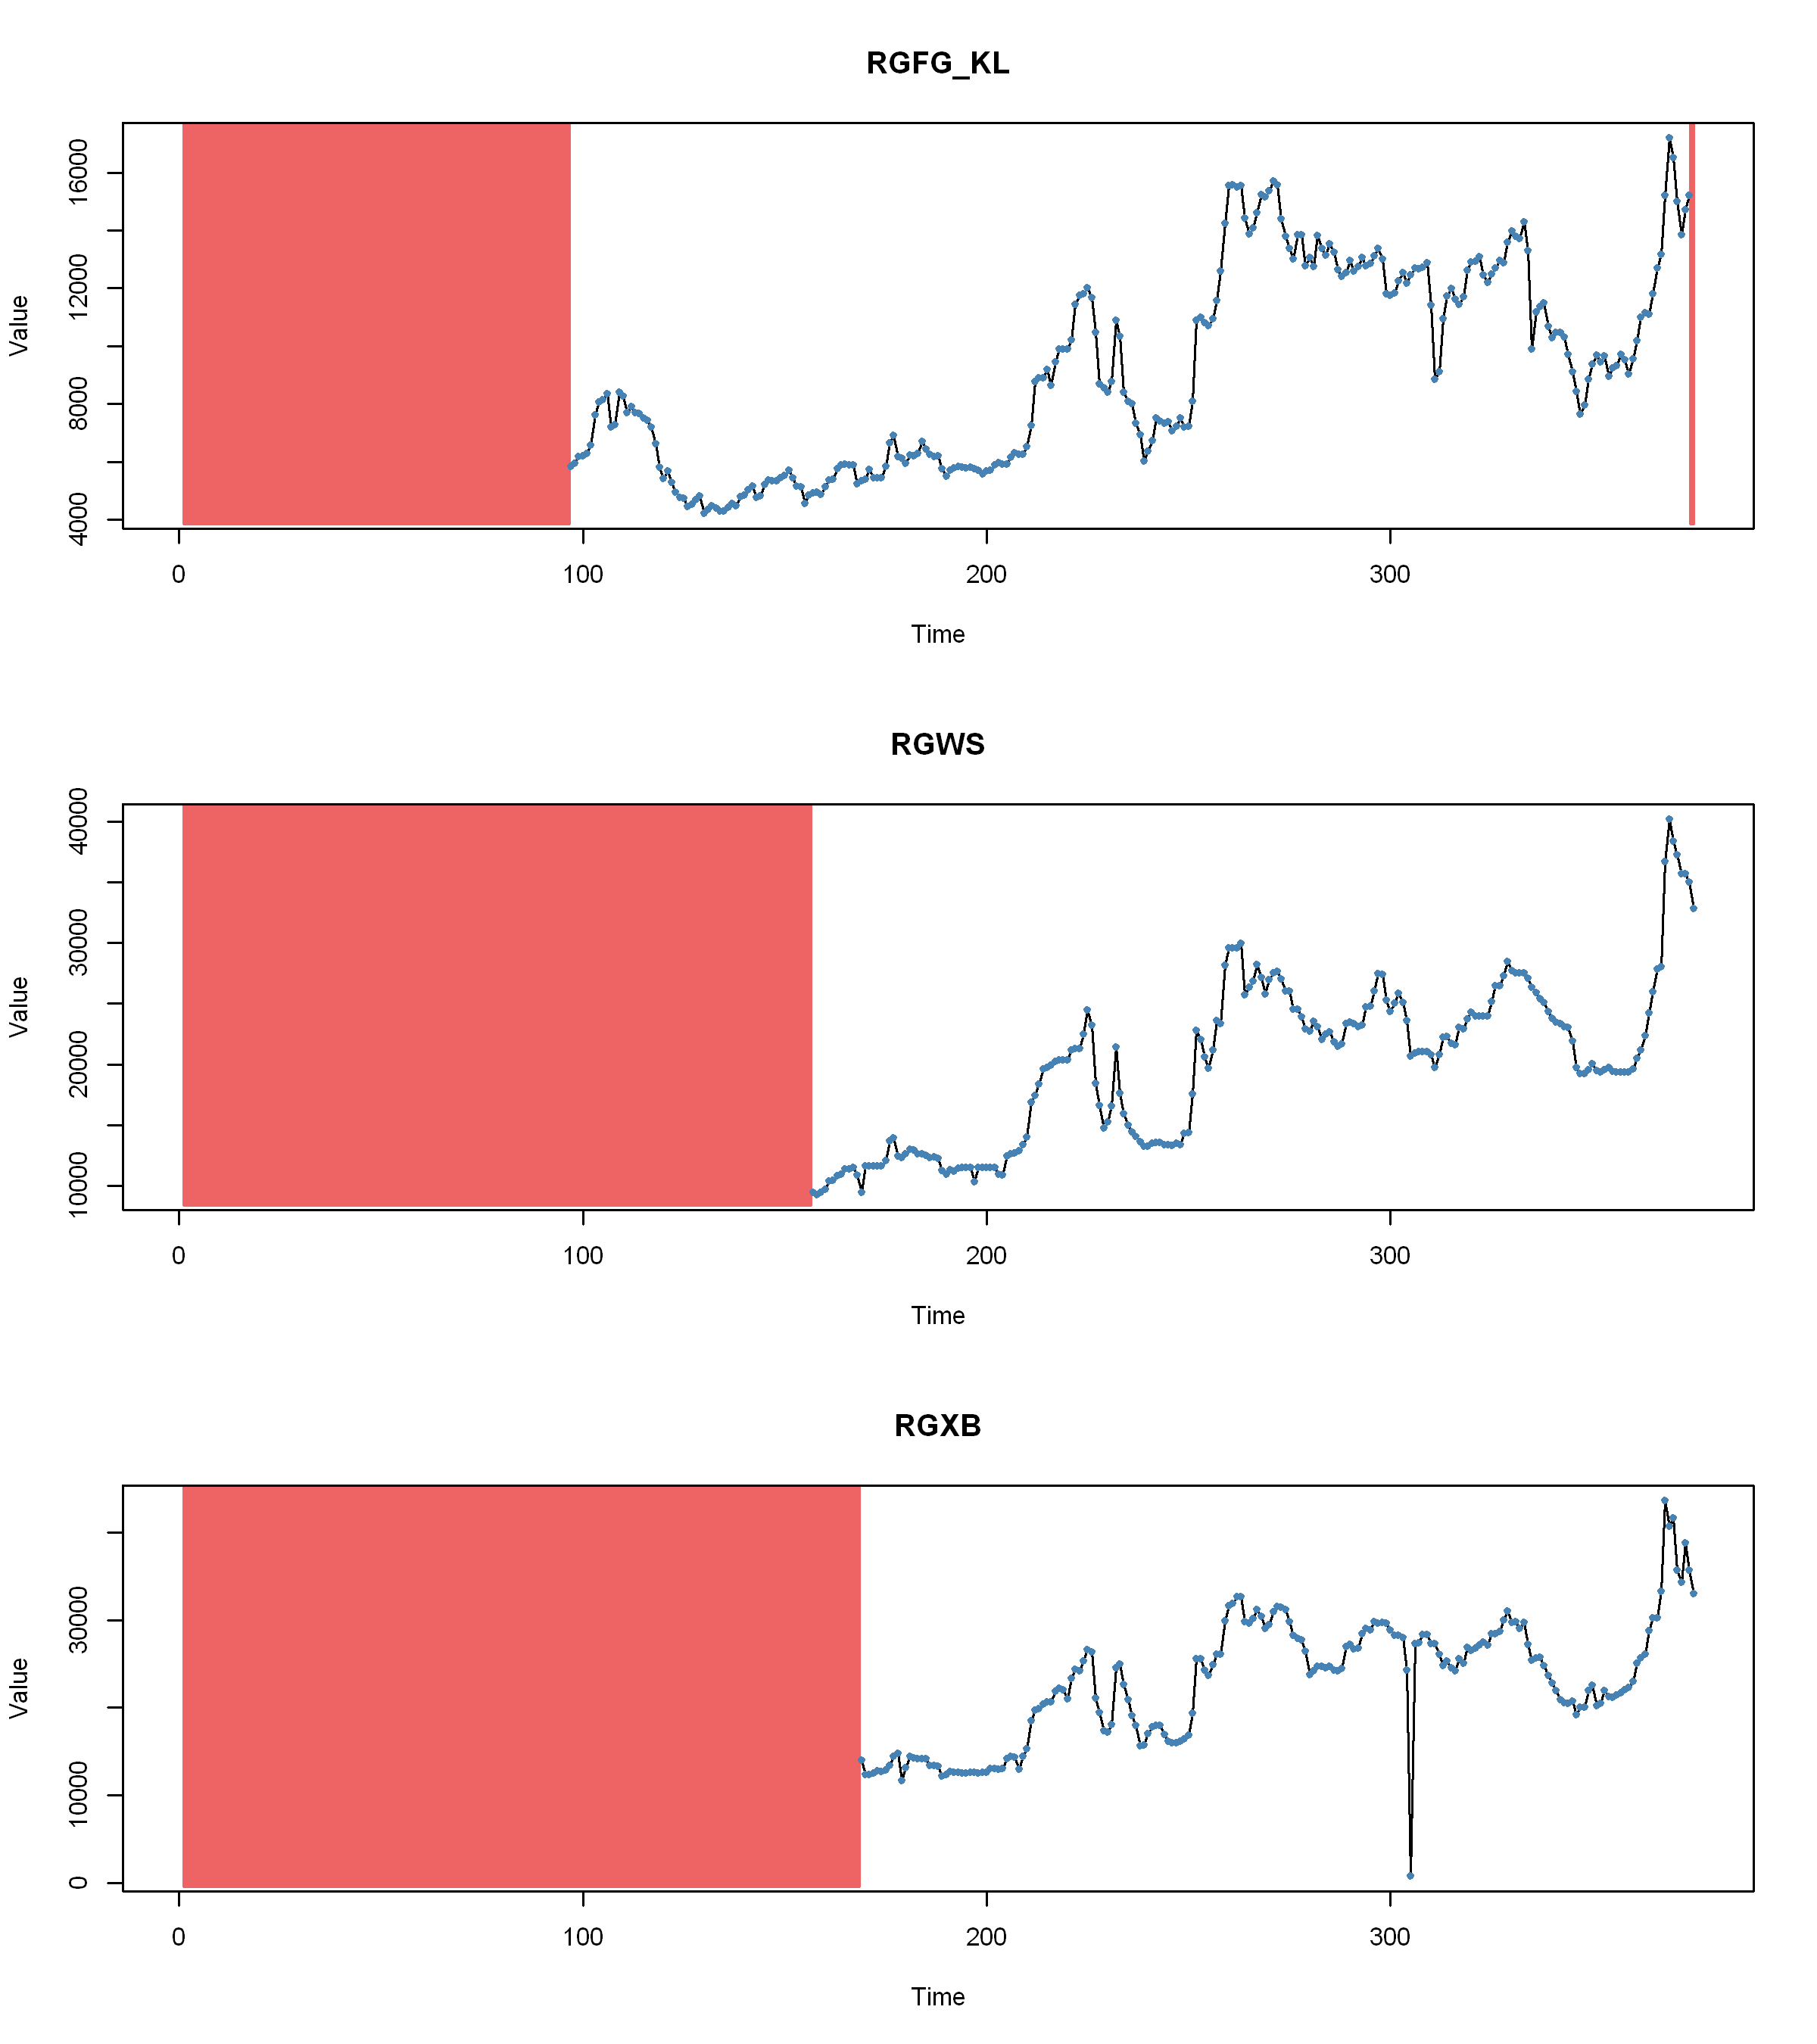

In [87]:
cols = names(price_xts)[startsWith(names(price_xts), 'RG')]
fgp = price_xts[, cols]
set_figsize(8, 9)
par(mfrow=c(3, 1))
for (i in 1:ncol(fgp)) {
  plotNA.distribution(fgp[,i], main=names(fgp)[i])
}

# จัดการ missing values

In [31]:
price %>% select(date, RHFG_0, RWFG_0, RGFG_0)

date,RHFG_0,RWFG_0,RGFG_0
<date>,<dbl>,<dbl>,<dbl>
1989-01-01,4237,3939,3317
1989-02-01,4331,4056,3385
1989-03-01,4420,4135,3370
...,...,...,...
2020-01-01,13757,7756,14258
2020-02-01,13914,8166,14732
2020-03-01,NA,NA,NA


In [20]:
fgp = price %>% select(RHFG_0, RWFG_0, RGFG_0) %>% na.omit()

In [27]:
unit_test_report(fgp)

col_name,level,type,ADF_cv01,ADF_cv05,ADF_cv10,ADF_lag,ADF_tstat,KPSS_cv01,KPSS_cv05,KPSS_cv10,KPSS_lag,KPSS_tstat,stationary_ADF,stationary_KPSS
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
RGFG_0,d0,drift,-3.44,-2.87,-2.57,1,-1.440819,0.739,0.463,0.347,16,1.83958044,FALSE,FALSE
RGFG_0,d0,trend,-3.98,-3.42,-3.13,1,-3.384603,0.216,0.146,0.119,16,0.12283863,FALSE,TRUE
RGFG_0,d1,drift,-3.44,-2.87,-2.57,1,-12.535239,0.739,0.463,0.347,16,0.03938942,TRUE,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RWFG_0,d0,drift,-3.44,-2.87,-2.57,1,-2.268186,0.739,0.463,0.347,16,1.62719500,FALSE,FALSE
RWFG_0,d0,trend,-3.98,-3.42,-3.13,1,-3.526155,0.216,0.146,0.119,16,0.17450941,TRUE,FALSE
RWFG_0,d1,drift,-3.44,-2.87,-2.57,1,-13.268290,0.739,0.463,0.347,16,0.04782837,TRUE,TRUE
